In [1]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [2]:
level_filtered = df[df['Value.EventType'].str.contains('InicioNivelEvent') | df['Value.EventType'].str.contains('MuerteJugadorEvent')]
from collections import defaultdict
# Guarda los niveles que se han completado por run y por persona
lvl_played_run = defaultdict(list)

run = 0
current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['Name'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
    # La unica manera de acabar la run es muriendo, asi se pasa a la siguiente
    if 'InicioNivelEvent' in level_filtered['Value.EventType'][ind]:
        # Cuando esta vacio o se aumenta de run, se hace un append a la lista
        if not lvl_played_run[a]:
            lvl_played_run[a].append(1)
        elif len(lvl_played_run[a]) is run:
            lvl_played_run[a].append(1)
        else:
            lvl_played_run[a][run] += 1
    else:
        run += 1

In [3]:
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

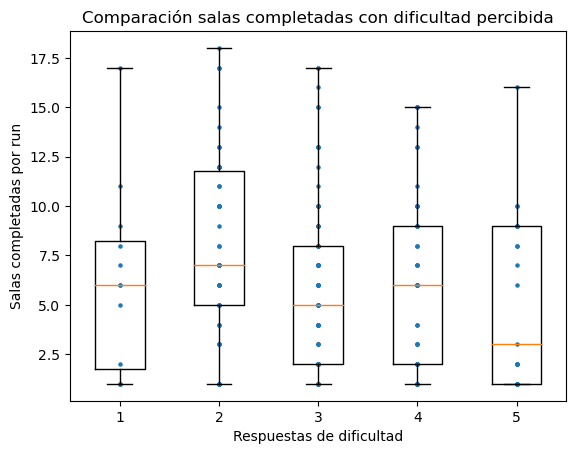

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for ind in skillsIDs:
    for i in range(0,len(skillsIDs[ind])):
        if skillsIDs[ind] and lvl_played_run[str(ind)]:
            if lvl_played_run[str(ind)][i] > 0 and lvl_played_run[str(ind)][i] < 20:
                x.append(skillsIDs[ind][i])
                y.append(lvl_played_run[str(ind)][i])
        
data = [[],[],[],[],[]]

for i in range(0,len(x)):
    data[int(x[i]) - 1].append(y[i])

plt.boxplot(data)
#plt.show
plt.scatter(x,y, s=5)

plt.xlabel("Respuestas de dificultad")
plt.ylabel("Salas completadas por run")
plt.title("Comparación salas completadas con dificultad percibida")

plt.savefig("Resultados/Salas-Forms.pdf", format="pdf", bbox_inches="tight")

plt.show()